In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# Analisis Exploratorio de Datos Call Center

## Carga de tabla

In [30]:
calls = pd.read_csv('Call_Center_1999.csv',delimiter = ';',encoding = "utf-8")

C:\Users\Carolina\AppData\Local\Temp\ipykernel_38796\195147161.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  calls = pd.read_csv('Call_Center_1999.csv',delimiter = ';',encoding = "utf-8")


In [31]:
calls

,vru.line,call_id,customer_id,priority,type,date,vru_entry,vru_exit,vru_time,q_start,q_exit,q_time,outcome,ser_start,ser_exit,ser_time,server,startdate
0,AA0101,33116,9664491.0,2,PS,1999-01-01,0:00:31,0:00:36,5,0:00:36,0:03:09,153,HANG,0:00:00,0:00:00,0,NO_SERVER,0
1,AA0101,33117,0.0,0,PS,1999-01-01,0:34:12,0:34:23,11,0:00:00,0:00:00,0,HANG,0:00:00,0:00:00,0,NO_SERVER,0
2,AA0101,33118,27997683.0,2,PS,1999-01-01,6:55:20,6:55:26,6,6:55:26,6:55:43,17,AGENT,6:55:43,6:56:37,54,MICHAL,0
3,AA0101,33119,0.0,0,PS,1999-01-01,7:41:16,7:41:26,10,0:00:00,0:00:00,0,AGENT,7:41:25,7:44:53,208,BASCH,0
4,AA0101,33120,0.0,0,PS,1999-01-01,8:03:14,8:03:24,10,0:00:00,0:00:00,0,AGENT,8:03:23,8:05:10,107,MICHAL,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444443,AA0216,17211,0.0,0,IN,1999-12-31,13:46:51,13:47:04,13,0:00:00,0:00:00,0,AGENT,13:47:03,13:56:16,553,Z2ELINOR,334
444444,AA0216,17212,0.0,0,IN,1999-12-31,13:58:31,13:58:40,9,13:58:40,13:59:49,69,HANG,0:00:00,0:00:00,0,NO_SERVER,334
444445,AA0216,17213,0.0,0,IN,1999-12-31,17:10:51,17:11:12,21,0:00:00,0:00:00,0,HANG,0:00:00,0:00:00,0,NO_SERVER,334
444446,AA0216,17214,0.0,0,IN,1999-12-31,18:30:19,18:30:54,35,0:00:00,0:00:00,0,HANG,0:00:00,0:00:00,0,NO_SERVER,334


In [32]:
calls.describe()

,call_id,priority,vru_time,q_time,ser_time,startdate
count,444448.000000,444448.000000,444448.000000,444448.000000,444448.000000,444448.000000
mean,31928.737202,0.780143,10.286081,59.004304,152.561776,172.333974
std,13945.516813,0.888851,34.942136,119.470328,282.372761,104.559247
min,1169.000000,0.000000,-362.000000,0.000000,0.000000,0.000000
25%,21449.000000,0.000000,6.000000,0.000000,12.000000,90.000000
50%,35256.000000,0.000000,8.000000,16.000000,84.000000,181.000000
75%,42803.000000,2.000000,10.000000,79.000000,185.000000,273.000000
max,55656.000000,2.000000,4832.000000,28693.000000,61437.000000,334.000000


In [33]:
calls['tiempo_cola']=calls['q_time']/60
calls['tiempo_vru']=calls['vru_time']/60
calls['tiempo_ser']=calls['ser_time']/60

## Analisis de los tiempos

### Analisis q_time

In [34]:
#Info estadistica de q_time
calls['tiempo_cola'].describe()

count    444448.000000
mean          0.983405
std           1.991172
min           0.000000
25%           0.000000
50%           0.266667
75%           1.316667
max         478.216667
Name: tiempo_cola, dtype: float64

Text(0.5, 1.0, 'Tiempo en cola')

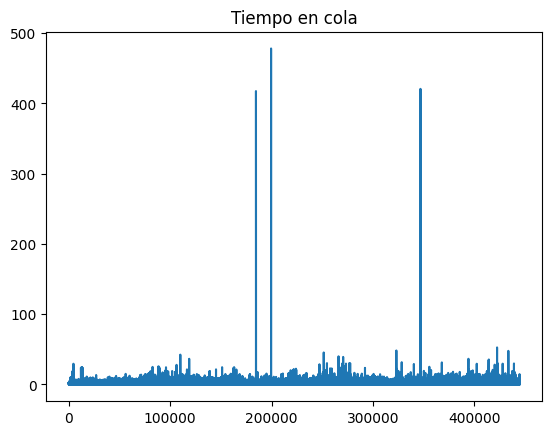

In [35]:
#Grafica de todos los datos
plt.plot(calls['tiempo_cola'])
plt.title('Tiempo en cola')

#### Boxplot

In [36]:
#Calculo de bigotes
Q3 = float(calls['tiempo_cola'].quantile(0.75))
Q1 = float(calls['tiempo_cola'].quantile(0.25))
RIC = Q3 - Q1

Min_q = Q1 - 1.5*RIC
if Min_q < min(calls['tiempo_cola']):
    Min_q = min(calls['tiempo_cola'])
Max_q = Q3 + 1.5*RIC
if Max_q > max(calls['tiempo_cola']):
    Max_q = max(calls['tiempo_cola'])

Min_q, Max_q

(0.0, 3.291666666666667)

(0.0, 55.0)

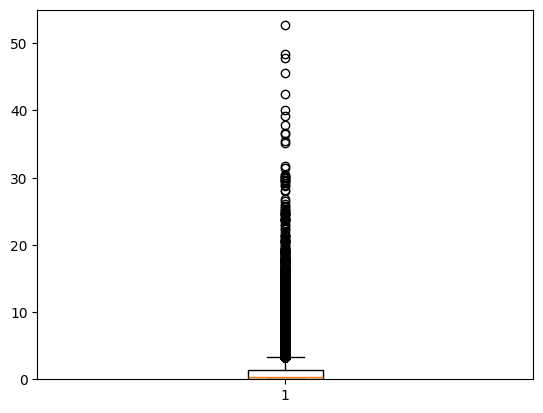

In [37]:
#Box plot sin los 3 Outliers principales (call_ id 20582 = 417.567, 5620 = 478.217, 28834 = 420.75)
plt.boxplot(calls['tiempo_cola'])
plt.ylim(0,55)

(0.0, 3.620833333333334)

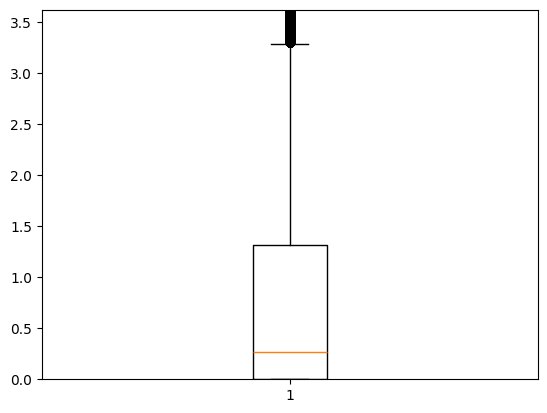

In [38]:
#Box plot enfocado en el box
b = plt.boxplot(calls['tiempo_cola'])
plt.ylim(Min_q*0.9,Max_q*1.1)

#### 3 sigmas

In [39]:
Max_q_s = calls['tiempo_cola'].mean() + (3 * calls['tiempo_cola'].std())
Min_q_s = calls['tiempo_cola'].mean() - (3 * calls['tiempo_cola'].std())

if Min_q_s < min(calls['tiempo_cola']):
    Min_q_s = min(calls['tiempo_cola'])
if Max_q_s > max(calls['tiempo_cola']):
    Max_q_s = max(calls['tiempo_cola'])

Min_q_s, Max_q_s

(0.0, np.float64(6.956921462544214))

#### Outliers

Se graficaron los limites calculados usando el metodo de Box Plot y los 3 sigmas. Teniendo en cuenta los resultados, se analizaron los outliers arrojados y se identificó que existian valor razonables importantes para el analisis. Por lo tanto, se decidió revisar nuevos limites haciendo uso del grafico. <br>
Finalmente, se seleccionó un tiempo de 15 minutos como valor máximo para el tiempo en cola.

Text(0.5, 1.0, 'Outliers Tiempo en Cola')

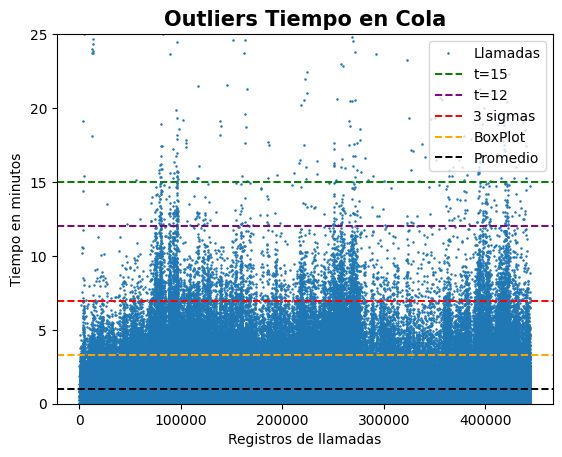

In [40]:
#Grafica de los datos sin outliers
plt.plot(calls['tiempo_cola'],'o', markersize = 0.8)
plt.axhline(y=15, color='green', linestyle='--', lw=1.4)
plt.axhline(y=12, color='purple', linestyle='--', lw=1.4)
plt.axhline(y=Max_q_s, color='r', linestyle='--', lw=1.4)
plt.axhline(y=Max_q, color='orange', linestyle='--', lw=1.4)
plt.axhline(y=calls['tiempo_cola'].mean(), color='black', linestyle='--', lw=1.4)
plt.legend(['Llamadas','t=15', 't=12', '3 sigmas', 'BoxPlot', 'Promedio'],loc="upper right" )
plt.ylim(Min_q_s*0.9,25)
plt.ylabel('Tiempo en minutos')
plt.xlabel('Registros de llamadas')
plt.title('Outliers Tiempo en Cola',fontsize=15,fontweight='bold')

#### Histograma

(0.0, 15.0)

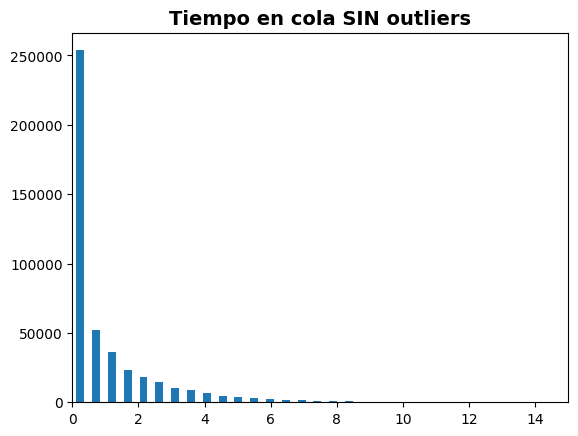

In [78]:
#Histograma sin outliers

plt.hist(calls['tiempo_cola'], bins=1000,rwidth=0.5)
plt.title("Tiempo en cola SIN outliers",fontsize=14, fontweight='bold')
plt.xlim(0,15)

### Analisis ser_time

In [42]:
#Info estadistica de ser_time
calls['tiempo_ser'].describe()

count    444448.000000
mean          2.542696
std           4.706213
min           0.000000
25%           0.200000
50%           1.400000
75%           3.083333
max        1023.950000
Name: tiempo_ser, dtype: float64

Text(0.5, 1.0, 'Tiempo en servicio')

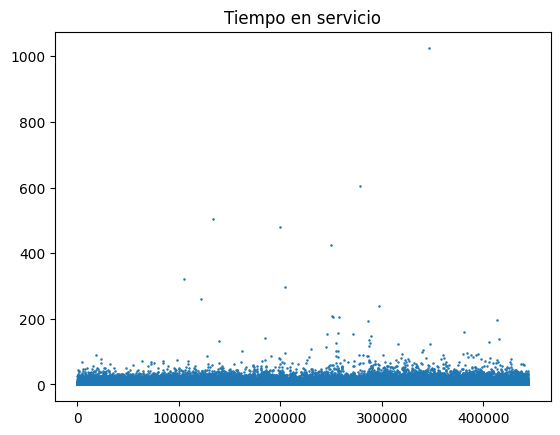

In [43]:
#Grafica de todos los datos
plt.plot(calls['tiempo_ser'],'o',markersize = 0.8)
plt.title('Tiempo en servicio')

#### Boxplot

In [44]:
#Calculo de bigotes
Q3 = float(calls['tiempo_ser'].quantile(0.75))
Q1 = float(calls['tiempo_ser'].quantile(0.25))
RIC = Q3 - Q1

Min_ser = Q1 - 1.5*RIC
if Min_ser < min(calls['tiempo_ser']):
    Min_ser = min(calls['tiempo_ser'])
Max_ser = Q3 + 1.5*RIC
if Max_ser > max(calls['tiempo_ser']):
    Max_ser = max(calls['tiempo_ser'])

Min_ser, Max_ser

(0.0, 7.408333333333333)

{'whiskers': [<matplotlib.lines.Line2D at 0x2c4564c2930>,
 'caps': [<matplotlib.lines.Line2D at 0x2c4564c0650>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c4564c1820>],
 'medians': [<matplotlib.lines.Line2D at 0x2c4564c09b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2c4564c0f80>],
 'means': []}

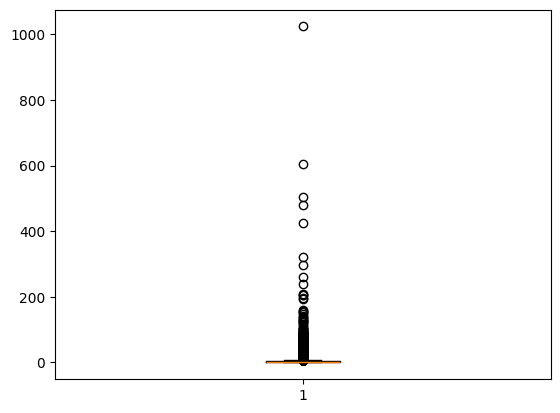

In [45]:
#Box plot completo
plt.boxplot(calls['tiempo_ser'])

(0.0, 8.149166666666668)

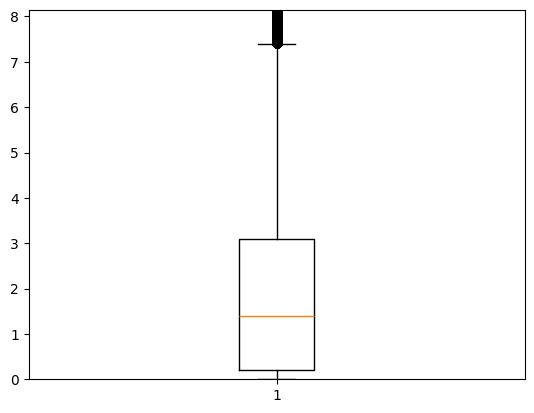

In [46]:
#Box plot enfocado en el box
plt.boxplot(calls['tiempo_ser'])
plt.ylim(Min_ser*0.9,Max_ser*1.1)

#### 3 sigmas

In [47]:
Max_ser_s = calls['tiempo_ser'].mean() + (3 * calls['tiempo_ser'].std())
Min_ser_s = calls['tiempo_ser'].mean() - (3 * calls['tiempo_ser'].std())

if Min_ser_s < min(calls['tiempo_ser']):
    Min_ser_s = min(calls['tiempo_ser'])
if Max_ser_s > max(calls['tiempo_ser']):
    Max_ser_s = max(calls['tiempo_ser'])

Min_ser_s, Max_ser_s

(0.0, np.float64(16.661334307839436))

#### Outliers

Se graficaron los limites calculados usando el metodo de Box Plot y los 3 sigmas. Teniendo en cuenta los resultados, se analizaron los outliers arrojados y se identificó que existian valor razonables importantes para el analisis. Por lo tanto, se decidió revisar nuevos limites haciendo uso del grafico. <br>
Finalmente, se seleccionó un tiempo de 50 minutos como valor máximo para el tiempo en servicio.

Text(0.5, 1.0, 'Outliers Tiempo en servicio')

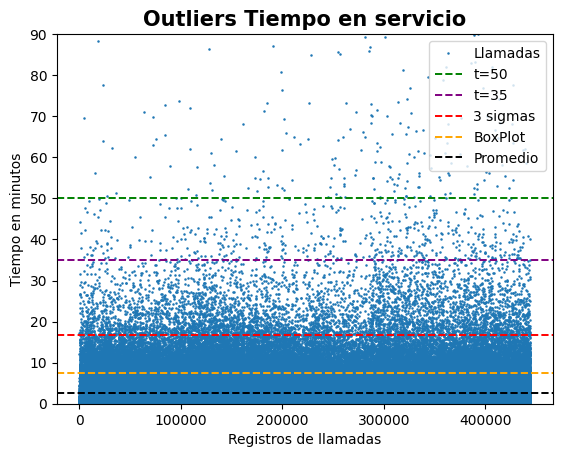

In [48]:
#Grafica de los datos
plt.plot(calls['tiempo_ser'],'o', markersize = 0.8)
plt.axhline(y=50, color='green', linestyle='--', lw=1.4)
plt.axhline(y=35, color='purple', linestyle='--', lw=1.4)
plt.axhline(y=Max_ser_s, color='r', linestyle='--', lw=1.4)
plt.axhline(y=Max_ser, color='orange', linestyle='--', lw=1.4) 
plt.axhline(y=calls['tiempo_ser'].mean(), color='black', linestyle='--', lw=1.4)
plt.legend(['Llamadas','t=50', 't=35', '3 sigmas', 'BoxPlot', 'Promedio'],loc="upper right" )
plt.ylabel('Tiempo en minutos')
plt.xlabel('Registros de llamadas')
plt.ylim(Min_ser_s*0.9,90)
plt.title('Outliers Tiempo en servicio',fontsize=15,fontweight='bold')

#### Histograma

(0.0, 50.0)

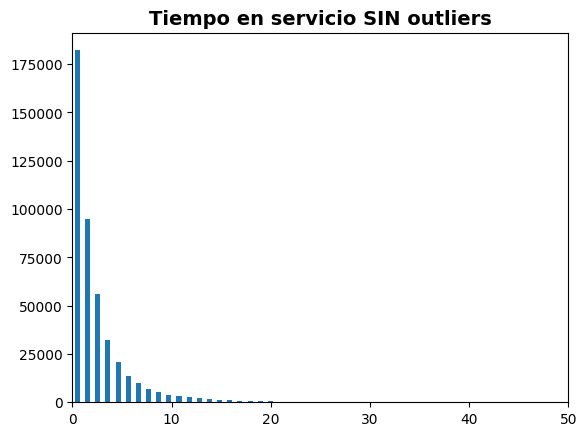

In [77]:
#Histograma sin outliers

plt.hist(calls['tiempo_ser'], bins=1000,rwidth=0.5)
plt.title("Tiempo en servicio SIN outliers",fontsize=14, fontweight='bold')
plt.xlim(0,50)


### Analisis vru_time

#### Con negativos

In [50]:
#Info estadistica de vru_time
calls['tiempo_vru'].describe()

count    444448.000000
mean          0.171435
std           0.582369
min          -6.033333
25%           0.100000
50%           0.133333
75%           0.166667
max          80.533333
Name: tiempo_vru, dtype: float64

Text(0.5, 1.0, 'Tiempo en vru')

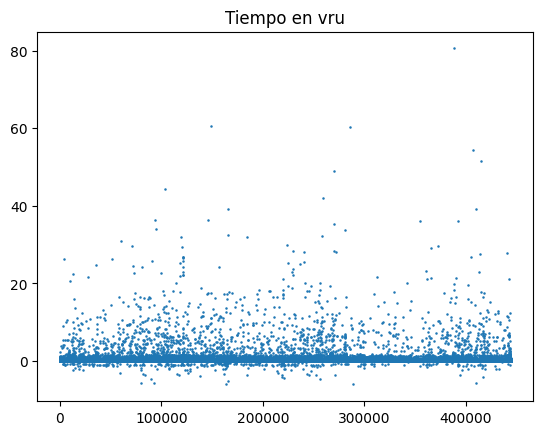

In [51]:
#Grafica de todos los datos
plt.plot(calls['tiempo_vru'],'o',markersize=0.8)
plt.title('Tiempo en vru')

##### Boxplot

In [52]:
#Calculo de bigotes
Q3 = float(calls['tiempo_vru'].quantile(0.75))
Q1 = float(calls['tiempo_vru'].quantile(0.25))
RIC = Q3 - Q1

Min_vru = Q1 - 1.5*RIC
if Min_vru < min(calls['tiempo_vru']):
    Min_vru = min(calls['tiempo_vru'])
Max_vru = Q3 + 1.5*RIC
if Max_vru > max(calls['tiempo_vru']):
    Max_vru = max(calls['tiempo_vru'])

Min_vru, Max_vru

(2.7755575615628914e-17, 0.2666666666666666)

{'whiskers': [<matplotlib.lines.Line2D at 0x2c45608cb00>,
 'caps': [<matplotlib.lines.Line2D at 0x2c45608cf20>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c45608c200>],
 'medians': [<matplotlib.lines.Line2D at 0x2c45608d460>],
 'fliers': [<matplotlib.lines.Line2D at 0x2c45608d6a0>],
 'means': []}

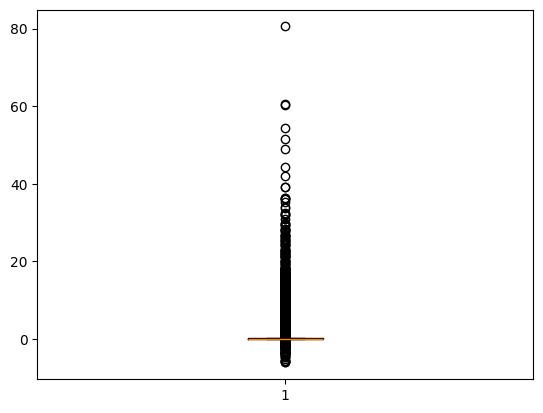

In [53]:
#Box plot completo
plt.boxplot(calls['tiempo_vru'])

(2.0816681711721685e-17, 0.2933333333333333)

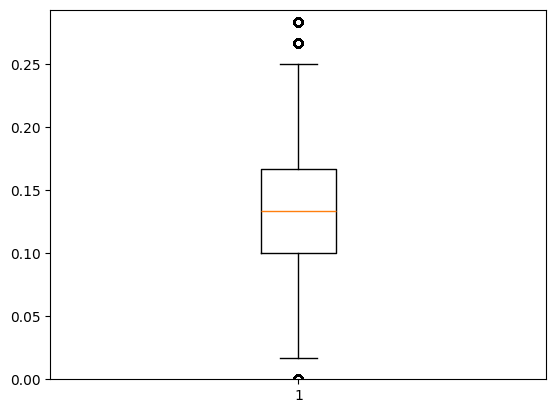

In [54]:
#Box plot enfocado en el box
b = plt.boxplot(calls['tiempo_vru'])
plt.ylim(Min_vru*0.75,Max_vru*1.1)

##### 3 sigmas

In [55]:
Max_vru_s = calls['tiempo_vru'].mean() + (3 * calls['tiempo_vru'].std())
Min_vru_s = calls['tiempo_vru'].mean() - (3 * calls['tiempo_vru'].std())

if Min_vru_s < min(calls['tiempo_vru']):
    Min_vru_s = min(calls['tiempo_vru'])
if Max_vru_s > max(calls['tiempo_vru']):
    Max_vru_s = max(calls['tiempo_vru'])

Min_vru_s, Max_vru_s

(np.float64(-1.5756721407594563), np.float64(1.9185414978045998))

Text(0.5, 1.0, 'Outliers Tiempo en vru segun 3 sigmas')

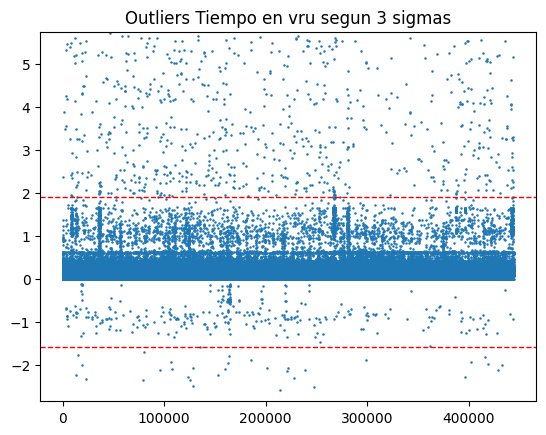

In [56]:
#Grafica de los datos sin outliers
plt.plot(calls['tiempo_vru'],'o', markersize = 0.8)
plt.axhline(y=Max_vru_s, color='r', linestyle='--', lw=1)
plt.axhline(y=Min_vru_s, color='r', linestyle='--', lw=1)
plt.ylim(Min_vru_s*1.8,Max_vru_s*3)
plt.title('Outliers Tiempo en vru segun 3 sigmas')


##### Histograma

(-1.5756721407594563, 1.9185414978045998)

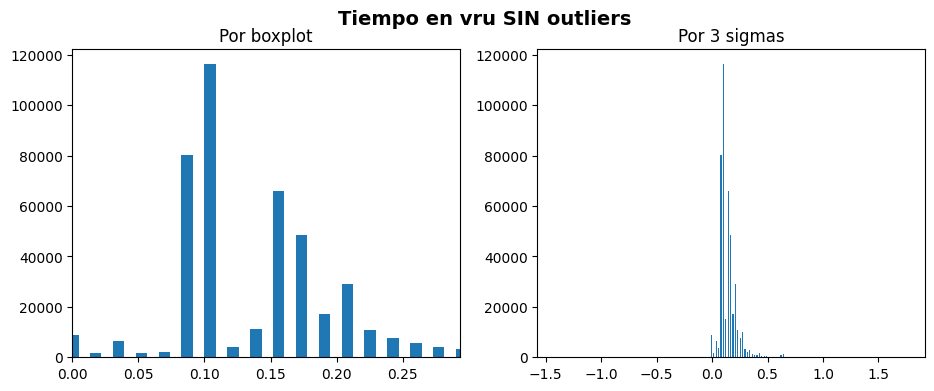

In [57]:
#Histograma sin outliers
fig, ax = plt.subplots(1, 2,figsize = (11,4))
fig.suptitle("Tiempo en vru SIN outliers",fontsize=14, fontweight='bold')

ax[0].hist(list(calls['tiempo_vru']), bins=5000,rwidth=0.5)
ax[0].set_title('Por boxplot')
ax[0].set_xlim(Min_vru*0.9,Max_vru*1.1)

ax[1].hist(calls['tiempo_vru'], bins=4000,rwidth=0.5)
ax[1].set_title('Por 3 sigmas')
ax[1].set_xlim(Min_vru_s,Max_vru_s)

#### Sin negativos

In [58]:
calls['vru_pos']=abs(calls['tiempo_vru'])

In [59]:
calls.describe()

,call_id,priority,vru_time,q_time,ser_time,startdate,tiempo_cola,tiempo_vru,tiempo_ser,vru_pos
count,444448.000000,444448.000000,444448.000000,444448.000000,444448.000000,444448.000000,444448.000000,444448.000000,444448.000000,444448.000000
mean,31928.737202,0.780143,10.286081,59.004304,152.561776,172.333974,0.983405,0.171435,2.542696,0.173273
std,13945.516813,0.888851,34.942136,119.470328,282.372761,104.559247,1.991172,0.582369,4.706213,0.581825
min,1169.000000,0.000000,-362.000000,0.000000,0.000000,0.000000,0.000000,-6.033333,0.000000,0.000000
25%,21449.000000,0.000000,6.000000,0.000000,12.000000,90.000000,0.000000,0.100000,0.200000,0.100000
50%,35256.000000,0.000000,8.000000,16.000000,84.000000,181.000000,0.266667,0.133333,1.400000,0.133333
75%,42803.000000,2.000000,10.000000,79.000000,185.000000,273.000000,1.316667,0.166667,3.083333,0.166667
max,55656.000000,2.000000,4832.000000,28693.000000,61437.000000,334.000000,478.216667,80.533333,1023.950000,80.533333


Text(0.5, 1.0, 'Tiempo en vru')

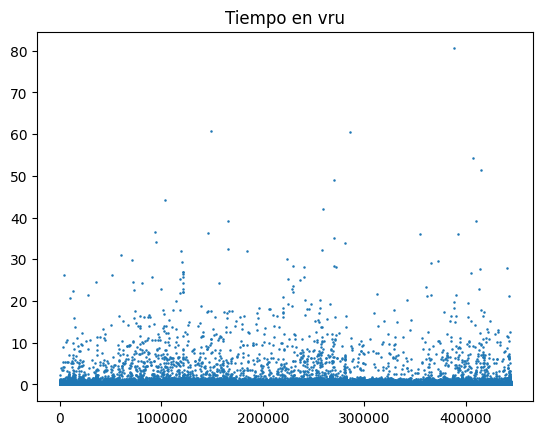

In [60]:
plt.plot(calls['vru_pos'],'o',markersize=0.8)
plt.title('Tiempo en vru')

##### Boxplot

In [61]:
#Calculo de bigotes DIO IGUAL QUE ORIGINAL
Q3 = float(calls['vru_pos'].quantile(0.75))
Q1 = float(calls['vru_pos'].quantile(0.25))
RIC = Q3 - Q1

Min_vru_p = Q1 - 1.5*RIC
if Min_vru_p < min(calls['vru_pos']):
    Min_vru_p = min(calls['vru_pos'])
Max_vru_p = Q3 + 1.5*RIC
if Max_vru_p > max(calls['vru_pos']):
    Max_vru_p = max(calls['vru_pos'])

Min_vru_p, Max_vru_p

(2.7755575615628914e-17, 0.2666666666666666)

{'whiskers': [<matplotlib.lines.Line2D at 0x2c4616a0ce0>,
 'caps': [<matplotlib.lines.Line2D at 0x2c4616a1100>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c455b74560>],
 'medians': [<matplotlib.lines.Line2D at 0x2c4616a15b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2c4616a17c0>],
 'means': []}

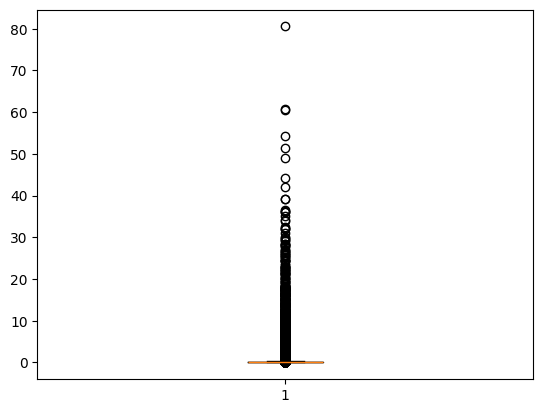

In [62]:
#Box plot completo
plt.boxplot(calls['vru_pos'])

(2.4980018054066023e-17, 0.2933333333333333)

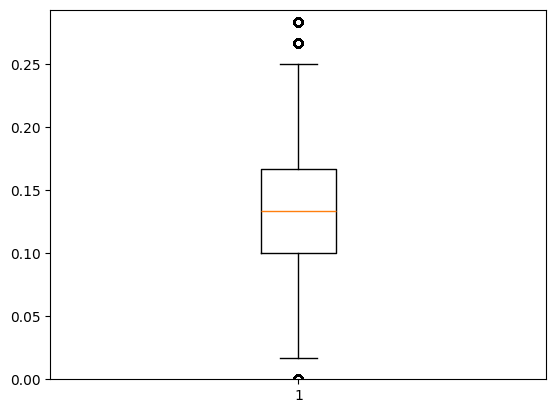

In [63]:
#Box plot enfocado en el box
b = plt.boxplot(calls['vru_pos'])
plt.ylim(Min_vru_p*0.9,Max_vru_p*1.1)

##### Sigmas

In [88]:
#Calculo para 1 sigma
Max_vru_p_s_1 = calls['vru_pos'].mean() + (1 * calls['vru_pos'].std())
Min_vru_p_s_1 = calls['vru_pos'].mean() - (1 * calls['vru_pos'].std())

if Min_vru_p_s_1 < min(calls['vru_pos']):
    Min_vru_p_s_1 = min(calls['vru_pos'])
if Max_vru_p_s_1 > max(calls['vru_pos']):
    Max_vru_p_s_1 = max(calls['vru_pos'])

Min_vru_p_s_1, Max_vru_p_s_1

(0.0, np.float64(0.755097356222619))

In [89]:
#Calculo para 2 sigmas
Max_vru_p_s_2 = calls['vru_pos'].mean() + (2 * calls['vru_pos'].std())
Min_vru_p_s_2 = calls['vru_pos'].mean() - (2 * calls['vru_pos'].std())

if Min_vru_p_s_2 < min(calls['vru_pos']):
    Min_vru_p_s_2 = min(calls['vru_pos'])
if Max_vru_p_s_2 > max(calls['vru_pos']):
    Max_vru_p_s_2 = max(calls['vru_pos'])

Min_vru_p_s_2, Max_vru_p_s_2

(0.0, np.float64(1.3369220986261485))

In [90]:
#Calculo para 3 sigmas
Max_vru_p_s_3 = calls['vru_pos'].mean() + (3 * calls['vru_pos'].std())
Min_vru_p_s_3 = calls['vru_pos'].mean() - (3 * calls['vru_pos'].std())

if Min_vru_p_s_3 < min(calls['vru_pos']):
    Min_vru_p_s_3 = min(calls['vru_pos'])
if Max_vru_p_s_3 > max(calls['vru_pos']):
    Max_vru_p_s_3 = max(calls['vru_pos'])

Min_vru_p_s_3, Max_vru_p_s_3

(0.0, np.float64(1.9187468410296782))

##### Outliers

Se graficaron los limites calculados usando el metodo de Box Plot y diferentes sigmas. Teniendo en cuenta los resultados, se decidió utilizar el valor arrojado por el método de los 3 sigmas: 1.92 minutos. <br>

Text(0.5, 1.0, 'Outliers Tiempo en VRU')

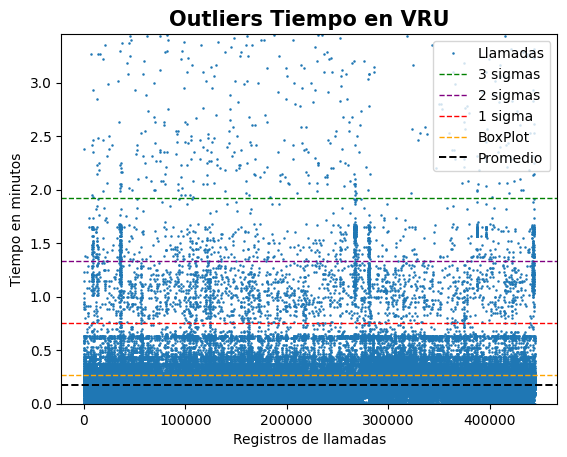

In [96]:
#Grafica de los outliers
plt.plot(calls['vru_pos'],'o', markersize = 0.8)
plt.axhline(y=Max_vru_p_s_3, color='green', linestyle='--', lw=1)
plt.axhline(y=Max_vru_p_s_2, color='purple', linestyle='--', lw=1)
plt.axhline(y=Max_vru_p_s_1, color='r', linestyle='--', lw=1)
plt.axhline(y=Max_vru, color='orange', linestyle='--', lw=1)
plt.axhline(y=calls['vru_pos'].mean(), color='black', linestyle='--', lw=1.4)
plt.ylim(0,Max_vru_p_s_3*1.8)
plt.legend(['Llamadas','3 sigmas', '2 sigmas', '1 sigma', 'BoxPlot', 'Promedio'],loc="upper right" )
plt.ylabel('Tiempo en minutos')
plt.xlabel('Registros de llamadas')
plt.title('Outliers Tiempo en VRU',fontsize=15,fontweight='bold')


##### Histograma

(0.0, 1.9187468410296782)

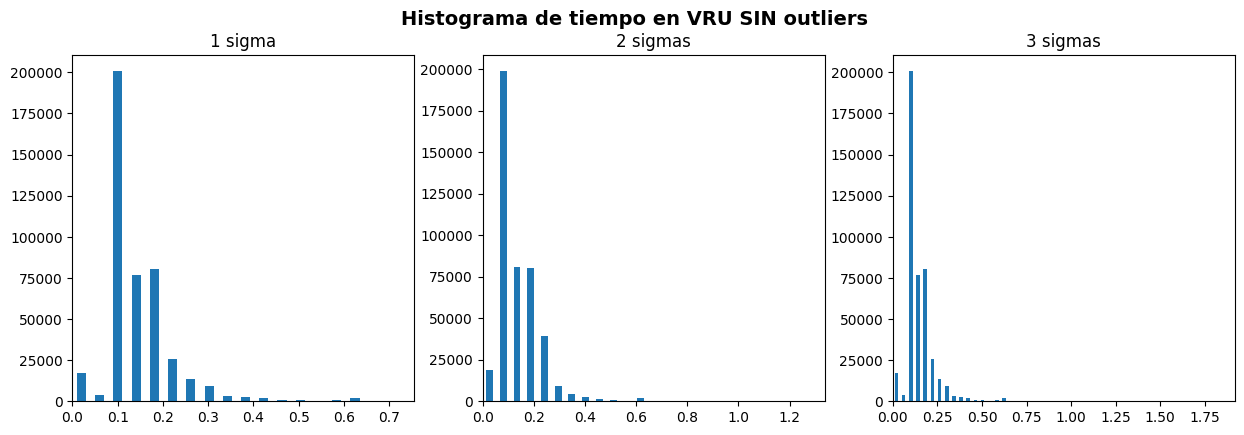

In [110]:
#Histograma sin outliers

fig, ax = plt.subplots(1, 3,figsize = (15,4.5))
fig.suptitle("Histograma de tiempo en VRU SIN outliers",fontsize=14, fontweight='bold')
ax[0].hist(calls['vru_pos'],bins=2000,rwidth=0.5)
ax[0].set_title('1 sigma')
ax[0].set_xlim(Min_vru_p_s_1,Max_vru_p_s_1)
ax[1].hist(calls['vru_pos'],bins=1500,rwidth=0.5)
ax[1].set_title('2 sigmas')
ax[1].set_xlim(Min_vru_p_s_2,Max_vru_p_s_2)
ax[2].hist(calls['vru_pos'],bins=2000,rwidth=0.5)
ax[2].set_title('3 sigmas')
ax[2].set_xlim(Min_vru_p_s_3,Max_vru_p_s_3)

### Graficos juntos

#### Boxplot completos

Text(0.5, 1.0, 'Tiempo en servicio')

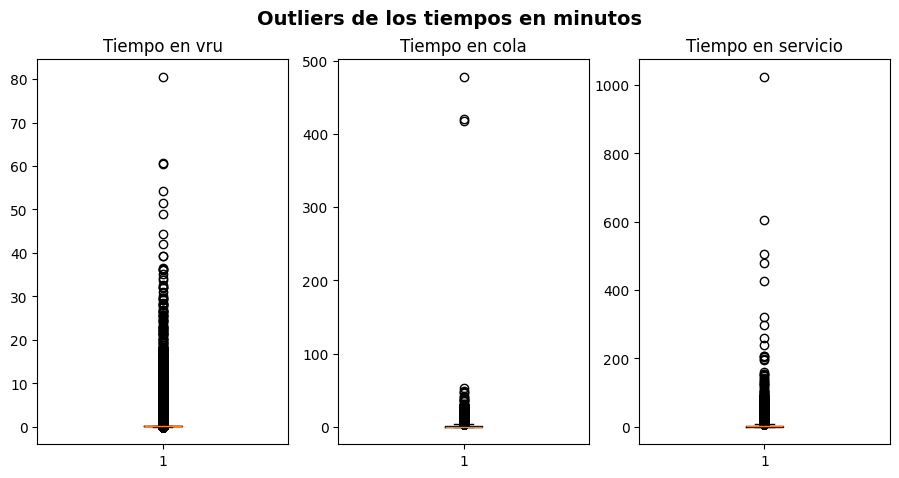

In [103]:
fig, ax = plt.subplots(1, 3,figsize = (11,5))
fig.suptitle("Outliers de los tiempos en minutos",fontsize=14, fontweight='bold')
ax[0].boxplot(calls['vru_pos'])
ax[0].set_title('Tiempo en vru')
ax[1].boxplot(calls['tiempo_cola'])
ax[1].set_title('Tiempo en cola')
ax[2].boxplot(calls['tiempo_ser'])
ax[2].set_title('Tiempo en servicio')

#### Boxplot enfocados en el box

(0.0, 488.95000000000005)

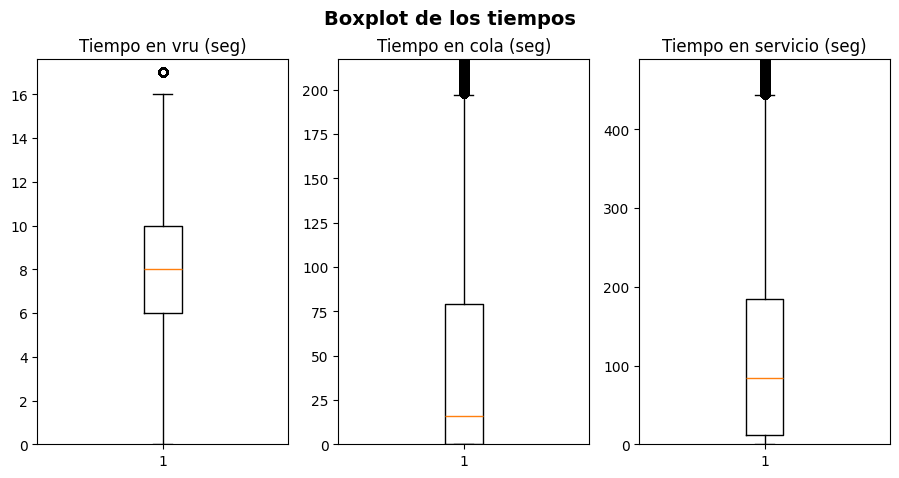

In [104]:
fig, ax = plt.subplots(1, 3,figsize = (11,5))
fig.suptitle("Boxplot de los tiempos",fontsize=14, fontweight='bold')
ax[0].boxplot(calls['vru_time'].abs())
ax[0].set_title('Tiempo en vru (seg)')
ax[0].set_ylim(Min_vru*0.9*60,Max_vru*1.1*60)
ax[1].boxplot(calls['q_time'])
ax[1].set_title('Tiempo en cola (seg)')
ax[1].set_ylim(Min_q*0.9*60,Max_q*1.1*60)
ax[2].boxplot(calls['ser_time'])
ax[2].set_title('Tiempo en servicio (seg)')
ax[2].set_ylim(Min_ser*0.9*60,Max_ser*1.1*60)

#### Histogramas

(0.0, 3000.0)

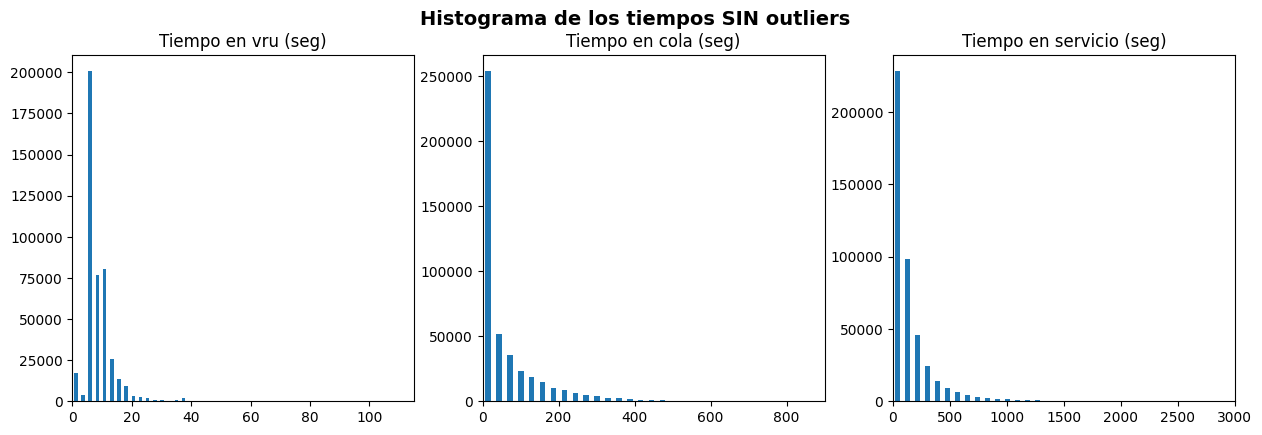

In [112]:
fig, ax = plt.subplots(1, 3,figsize = (15,4.5))
fig.suptitle("Histograma de los tiempos SIN outliers",fontsize=14, fontweight='bold')
ax[0].hist(calls['vru_time'].abs(),bins=2000,rwidth=0.5)
ax[0].set_title('Tiempo en vru (seg)')
ax[0].set_xlim(Min_vru_p_s_3*60,Max_vru_p_s_3*60)
ax[1].hist(calls['q_time'],bins=1000,rwidth=0.5)
ax[1].set_title('Tiempo en cola (seg)')
ax[1].set_xlim(0,15*60)
ax[2].hist(calls['ser_time'],bins=700,rwidth=0.5)
ax[2].set_title('Tiempo en servicio (seg)')
ax[2].set_xlim(0,50*60)